In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp
import math

In [2]:
def lux_dynamics(y, t, c0, k1, kD, k2, k5, k6, k3, k4, A):
    # y[0] = R
    # y[1] = C
    # y[2] = RA
    dydt = np.zeros(3)
    dydt[0] = c0 + ((k1 * y[1]) / (y[1] + kD)) - (k2 * y[0]) - k5 * y[0] * A + k6 * y[2]
    dydt[1] = (k3 * (y[2]) ** 2) - (k4 * y[1])
    dydt[2] = (k5 * y[0]) * A - (k6 * y[2]) - (2 * k3 * (y[2]) ** 2) + (2 * k4 * y[1])
    return dydt

In [3]:
def find_bistability(theta):
  #Will match equation 1 for figure (?)4
  line_a =  (2 + theta)**2 / (1+ 2*theta)
  line_b = 2*(1 + theta)**2 / theta
  return line_a, line_b

In [4]:
def plot_bistability_regions(c0, k1, kD, k2, k5, k6, k3, k4, A_values, y0, t):
    R_values = np.zeros(2)
    init_R = [1,30]
    tspan = [t[0],t[-1]]
    for i, ir in enumerate(init_R):
      y0[0]= ir
      sol = solve_ivp(lambda t,y0:lux_dynamics(y0, t, c0, k1, kD, k2, k5, k6, k3, k4, A),tspan,y0,t_eval=t)
      R_values[i] = sol.y[0][-1]
    return R_values

In [5]:
# intialize constants
y0 = [25, 200, 500]
t = np.linspace(0, 1000, 1000)
c0, k1, kD, k2, k5, k6, k3, k4 = 1, 360, 2, 18, 1, 2, 4, 1
A_values = np.linspace(10, 20, 10)  # Values of A to vary
A = 6.0
delta_values = [1]
gamma_values = [20, 16, 12, 8]
theta_values = np.linspace(0.1, 9.5, 100)
# Concentrations of AIex
AIex_values = np.linspace(0, 100, 5)

# Simulate response peak maxima
response_maxima_induced = []
response_maxima_diluted = []

tspan = [t[0],t[-1]]

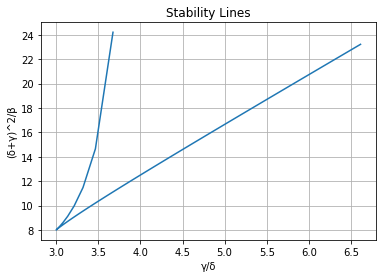

In [6]:
line_a, line_b = find_bistability(theta_values)

# Plot the lines
plt.plot(line_a,line_b)
#plt.plot(theta_values, line_b, label='Line B')

plt.xlabel('γ/δ')
plt.ylabel('(δ+γ)^2/β')
plt.title('Stability Lines')
plt.grid(True)
plt.show()


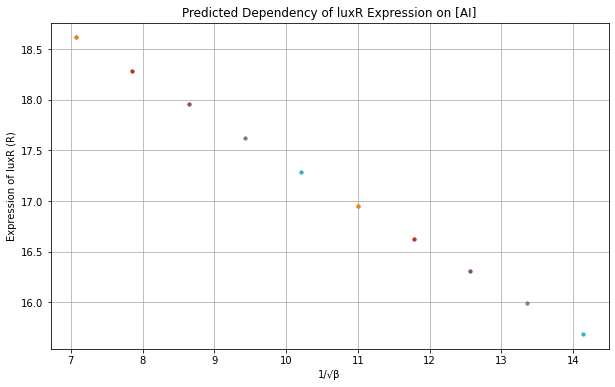

In [8]:
plt.figure(figsize=(10, 6))
for A in A_values:
  r_val = plot_bistability_regions(c0, k1, kD, k2, k5, k6, k3, k4, A_values, y0, t)
  beta  = kD/(A**2)
  x_val = 1/ math.sqrt(beta)

  # Plot the lines
  plt.plot(x_val,r_val[0], ".")
  plt.plot(x_val,r_val[1], ".")
plt.xlabel('1/√β')
plt.ylabel('Expression of luxR (R)')
plt.title('Predicted Dependency of luxR Expression on [AI]')
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (12,)

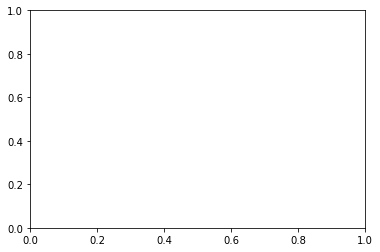

In [10]:
for AIex in AIex_values:
    # Simulate response when induced to 100 nM AIex
    #sol_induced = solve_ivp(lambda t,y0:lux_dynamics(y0, t, c0, k1, kD, k2, k5, k6, k3, k4, AIex),tspan,y0,t_eval=t)
    response_maxima_induced.append(solve_ivp(lambda t,y0:lux_dynamics(y0, t, c0, k1, kD, k2, k5, k6, k3, k4, AIex),tspan,y0,t_eval=t))
    # odeint(lux_dynamics, y0, t, args=(c0, k1, kD, k2, k5, k6, k3, k4, AIex))
    #response_maxima_induced.append(np.max(sol_induced.y[0]))

    # Simulate response when diluted from 100 nM AIex
    #sol_diluted = solve_ivp(lambda t,y0:lux_dynamics(y0, t, c0, k1, kD, k2, k5, k6, k3, k4, 100),tspan,y0,t_eval=t)
    #response_maxima_induced.append(np.max(sol_induced.y[0]))
    response_maxima_induced.append(solve_ivp(lambda t,y0:lux_dynamics(y0, t, c0, k1, kD, k2, k5, k6, k3, k4, AIex),tspan,y0,t_eval=t))

# Plot the comparison
plt.plot(AIex_values, response_maxima_induced, color='red', label='UP')
plt.plot(AIex_values, response_maxima_diluted, color='blue', label='DOWN')
plt.xlabel('[AIex] (nM)')
plt.ylabel('Response Peak Maxima')
plt.title('Comparison of Response Peak Maxima')
plt.legend()
plt.grid(True)
plt.show()